In [4]:
from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
import numpy as np
import swifter  # Makes applying to datframe as fast as vectorizing
from nltk.probability import FreqDist
import string
from nltk.corpus import stopwords
import glob
import os
import pandas as pd
import re
from textblob import TextBlob, Word
import nltk
from nltk.util import ngrams
import re
# nltk.download('stopwords')
from sys import argv
from scipy import sparse
from ast import literal_eval
import multiprocessing as mp
from IPython.display import HTML, display
import tabulate

from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cycler

In [ ]:

from matplotlib.widgets import CheckButtons

# IPython_default = plt.rcParams.copy()

plt.style.use('seaborn-paper')
# colors = cycler('color',
#                 ['#EE6666', '#3388BB', '#9988DD',
#                  '#EECC55', '#88BB44', '#FFBBBB'])
# plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
#        axisbelow=True, grid=True, prop_cycle=colors)
# plt.rc('grid', color='w', linestyle='solid')
# plt.rc('xtick', direction='out', color='gray')
# plt.rc('ytick', direction='out', color='gray')
# plt.rc('patch', edgecolor='#E6E6E6')
# plt.rc('lines', linewidth=2)

In [ ]:
def fix_eval_issue(doc):
    return literal_eval(doc)

In [ ]:
jsd_bigrams_freq_1_removed = pd.read_csv("~/Documents/mcl_jsd/bigrams/JSD_output_bigrams_freq_1_removed.csv")
jsd_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed.reset_index(drop=True)
jsd_bigrams_freq_1_removed.index = jsd_bigrams_freq_1_removed.index + 1

In [ ]:
column_names = ['weight', 'inflation', 'cluster', 'total_size', 'pre_jsd_size', 'missing_values',
       'post_jsd_size', 'jsd_nans', 'mean_jsd', 'min_jsd', 'percentile_25_jsd',
       'median_jsd', 'percentile_75_jsd', 'max_jsd', 'std_dev_jsd',
       'total_unique_bigrams', 'random_jsd']

ncf_20_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/ncf_20_jsd_random.csv", names=column_names)
ncf_30_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/ncf_30_jsd_random.csv", names=column_names)
ncf_40_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/ncf_40_jsd_random.csv", names=column_names)
ncf_60_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/ncf_60_jsd_random.csv", names=column_names)
sf_20_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/sf_20_jsd_random.csv", names=column_names)
sf_30_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/sf_30_jsd_random.csv", names=column_names)
sf_40_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/sf_40_jsd_random.csv", names=column_names)
sf_60_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/sf_60_jsd_random.csv", names=column_names)
now_20_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/now_20_jsd_random.csv", names=column_names)
now_30_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/now_30_jsd_random.csv", names=column_names)
now_40_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/now_40_jsd_random.csv", names=column_names)
now_60_jsd_bigrams_all_retained = pd.read_csv("~/Documents/mcl_jsd/bigrams/now_60_jsd_random.csv", names=column_names)

names = ['NCF 20', 'NCF 30', 'NCF 40', 'NCF 60', 
         'SF 20', 'SF 30', 'SF 40', 'SF 60', 
         'NOW 20', 'NOW 30', 'NOW 40', 'NOW 60']

df_list_bigrams_all_retained = [ncf_20_jsd_bigrams_all_retained, ncf_30_jsd_bigrams_all_retained, ncf_40_jsd_bigrams_all_retained, ncf_60_jsd_bigrams_all_retained, 
           sf_20_jsd_bigrams_all_retained, sf_30_jsd_bigrams_all_retained, sf_40_jsd_bigrams_all_retained, sf_60_jsd_bigrams_all_retained,
          now_20_jsd_bigrams_all_retained, now_30_jsd_bigrams_all_retained, now_40_jsd_bigrams_all_retained, now_60_jsd_bigrams_all_retained]


In [ ]:
for df in df_list_bigrams_all_retained:
    
    df['random_jsd'] = df['random_jsd'].swifter.progress_bar(False).apply(fix_eval_issue)
    df['mean_random_jsd'] = np.mean(df['random_jsd'].tolist(), axis = 1)
    df['random_jsd_range'] = np.max(df['random_jsd'].tolist(), axis = 1)-np.min(df['random_jsd'].tolist(), axis = 1)
    df['jsd_coherence_bigrams_all_retained'] = df['mean_random_jsd']-df['mean_jsd']


In [ ]:
# sf_40_jsd_bigrams_all_retained = sf_40_jsd_bigrams_all_retained.drop_duplicates(subset='cluster').reset_index(drop=True) # ---> Accidentally ran the script twice for a few clusters

ncf_20_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='ncf') & (jsd_bigrams_freq_1_removed['inflation'] == 20)][1:].reset_index(drop=True)
ncf_30_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='ncf') & (jsd_bigrams_freq_1_removed['inflation'] == 30)][1:].reset_index(drop=True)
ncf_40_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='ncf') & (jsd_bigrams_freq_1_removed['inflation'] == 40)][1:].reset_index(drop=True)
ncf_60_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='ncf') & (jsd_bigrams_freq_1_removed['inflation'] == 60)][1:].reset_index(drop=True)

sf_20_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='sf') & (jsd_bigrams_freq_1_removed['inflation'] == 20)][1:].reset_index(drop=True)
sf_30_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='sf') & (jsd_bigrams_freq_1_removed['inflation'] == 30)][1:].reset_index(drop=True)
sf_40_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='sf') & (jsd_bigrams_freq_1_removed['inflation'] == 40)][1:].reset_index(drop=True)
sf_60_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='sf') & (jsd_bigrams_freq_1_removed['inflation'] == 60)][1:].reset_index(drop=True)

now_20_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='now') & (jsd_bigrams_freq_1_removed['inflation'] == 20)][1:].reset_index(drop=True)
now_30_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='now') & (jsd_bigrams_freq_1_removed['inflation'] == 30)][1:].reset_index(drop=True)
now_40_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='now') & (jsd_bigrams_freq_1_removed['inflation'] == 40)][1:].reset_index(drop=True)
now_60_bigrams_freq_1_removed = jsd_bigrams_freq_1_removed[(jsd_bigrams_freq_1_removed['weight'] =='now') & (jsd_bigrams_freq_1_removed['inflation'] == 60)][1:].reset_index(drop=True)


now_30_bigrams_freq_1_removed = now_30_bigrams_freq_1_removed[(now_30_bigrams_freq_1_removed['cluster']!=3) & (now_30_bigrams_freq_1_removed['cluster']!=6) & (now_30_bigrams_freq_1_removed['cluster']!=7)].reset_index(drop=True)


now_20_bigrams_freq_1_removed = now_20_bigrams_freq_1_removed[now_20_bigrams_freq_1_removed['cluster']!=18].reset_index(drop=True)
now_40_bigrams_freq_1_removed = now_40_bigrams_freq_1_removed[now_40_bigrams_freq_1_removed['cluster']!=2].reset_index(drop=True)
now_60_bigrams_freq_1_removed = now_60_bigrams_freq_1_removed[now_60_bigrams_freq_1_removed['cluster']!=2].reset_index(drop=True)
sf_30_bigrams_freq_1_removed = sf_30_bigrams_freq_1_removed[sf_30_bigrams_freq_1_removed['cluster']!=2].reset_index(drop=True)
sf_40_bigrams_freq_1_removed = sf_40_bigrams_freq_1_removed[sf_40_bigrams_freq_1_removed['cluster']!=2].reset_index(drop=True)

df_list_bigrams_freq_1_removed = [ncf_20_bigrams_freq_1_removed, ncf_30_bigrams_freq_1_removed, ncf_40_bigrams_freq_1_removed, ncf_60_bigrams_freq_1_removed, 
               sf_20_bigrams_freq_1_removed, sf_30_bigrams_freq_1_removed, sf_40_bigrams_freq_1_removed, sf_60_bigrams_freq_1_removed,
              now_20_bigrams_freq_1_removed, now_30_bigrams_freq_1_removed, now_40_bigrams_freq_1_removed, now_60_bigrams_freq_1_removed]

In [ ]:
for i in range(len(df_list_bigrams_all_retained)):
    
    df_list_bigrams_all_retained[i]['jsd_coherence_bigrams_freq_1_removed'] = df_list_bigrams_all_retained[i]['mean_random_jsd'] - df_list_bigrams_all_retained[i]['mean_jsd']
    df_list_bigrams_freq_1_removed[i]['jsd_coherence_bigrams_freq_1_removed'] = df_list_bigrams_all_retained[i]['mean_random_jsd'] - df_list_bigrams_freq_1_removed[i]['mean_jsd']
    
    
    df_list_bigrams_all_retained[i]['cluster_bins'] = ( (df_list_bigrams_all_retained[i]['pre_jsd_size']//10) * 10 ) + 5
    df_list_bigrams_all_retained[i]['cluster_bins'] = df_list_bigrams_all_retained[i]['cluster_bins'].astype('int')
    
    df_list_bigrams_freq_1_removed[i]['cluster_bins'] = ( (df_list_bigrams_freq_1_removed[i]['post_jsd_size']//10) * 10 ) + 5
    df_list_bigrams_freq_1_removed[i]['cluster_bins'] = df_list_bigrams_freq_1_removed[i]['cluster_bins'].astype('int')


In [ ]:
# from matplotlib.widgets import CheckButtons

# plt.figure(figsize=(20, 8))
# plt.title('Range of Random JSD Values by Cluster Number', fontsize=15)
# ncf_20, = plt.plot(ncf_20_jsd['cluster'], ncf_20_jsd['random_jsd_range'], label = 'ncf 20', visible=False)
# ncf_30, = plt.plot(ncf_30_jsd['cluster'], ncf_30_jsd['random_jsd_range'], label = 'ncf 30', visible=False)
# ncf_40, = plt.plot(ncf_40_jsd['cluster'], ncf_40_jsd['random_jsd_range'], label = 'ncf 40', visible=False)
# ncf_60, = plt.plot(ncf_60_jsd['cluster'], ncf_60_jsd['random_jsd_range'], label = 'ncf 60', visible=False)

# sf_20, = plt.plot(sf_20_jsd['cluster'], sf_20_jsd['random_jsd_range'], label = 'sf 20', visible=False)
# sf_30, = plt.plot(sf_30_jsd['cluster'], sf_30_jsd['random_jsd_range'], label = 'sf 30', visible=False)
# sf_40, = plt.plot(sf_40_jsd['cluster'], sf_40_jsd['random_jsd_range'], label = 'sf 40', visible=False)
# sf_60, = plt.plot(sf_60_jsd['cluster'], sf_60_jsd['random_jsd_range'], label = 'sf 60', visible=False)

# now_20, = plt.plot(now_20_jsd['cluster'], now_20_jsd['random_jsd_range'], label = 'now 20', visible=True)
# now_30, = plt.plot(now_30_jsd['cluster'], now_30_jsd['random_jsd_range'], label = 'now 30', visible=True)
# now_40, = plt.plot(now_40_jsd['cluster'], now_40_jsd['random_jsd_range'], label = 'now 40', visible=True)
# now_60, = plt.plot(now_60_jsd['cluster'], now_60_jsd['random_jsd_range'], label = 'now 60', visible=True)

# plt.legend(handles=[ncf_20, ncf_30, ncf_40, ncf_60, 
#                     sf_20, sf_30, sf_40, sf_60,
#                     now_20, now_30, now_40, now_60])

# lines = [ncf_20, ncf_30, ncf_40, ncf_60,
#          sf_20, sf_30, sf_40, sf_60,
#          now_20, now_30, now_40, now_60]

# plt.xlabel('Cluster Number', fontsize=12)
# plt.ylabel('Random JSD Range', fontsize=12)

# # Make checkbuttons with all plotted lines with correct visibility
# rax = plt.axes([0.02, 0.4, 0.05, 0.25])
# labels = [str(line.get_label()) for line in lines]
# visibility = [line.get_visible() for line in lines]
# check = CheckButtons(rax, labels, visibility)


# def func(label):
#     index = labels.index(label)
#     lines[index].set_visible(not lines[index].get_visible())
#     plt.draw()

# check.on_clicked(func)

# plt.show()

In [ ]:
# for i in range(len(df_list_bigrams_all_retained)):

#     bp = df_list_bigrams_all_retained[i].boxplot(column = 'mean_jsd', by='cluster_bins', figsize=(20, 5), rot = 0)

#     # label adjustment
#     p = plt.gca()
#     p.set_xlabel("Cluster Size", fontsize = 12)
#     p.set_ylabel("JSD", fontsize = 12)
#     title_text = names[i] + " Mean JSD Values by Cluster Bins of Size 5"
#     plt.suptitle(title_text, fontsize=16)
#     p.set_title("Vocabulary - All Retained")
#     p.tick_params(axis='y', labelsize=8)
#     p.tick_params(axis='x', labelsize=8)

In [ ]:
# for i in range(len(df_list_bigrams_freq_1_removed)):

#     bp = df_list_bigrams_freq_1_removed[i].boxplot(column = 'mean_jsd', by='cluster_bins', figsize=(20, 5), rot = 0)

#     # label adjustment
#     p = plt.gca()
#     p.set_xlabel("Cluster Size", fontsize = 12)
#     p.set_ylabel("JSD", fontsize = 12)
#     title_text = names[i] + " Mean JSD Values by Cluster Bins of Size 5"
#     plt.suptitle(title_text, fontsize=16)
#     p.set_title("Vocabulary - Frequency 1 Removed")
#     p.tick_params(axis='y', labelsize=8)
#     p.tick_params(axis='x', labelsize=8)

In [ ]:
for i in range(len(df_list_bigrams_freq_1_removed)):

    bp = df_list_bigrams_freq_1_removed[i].boxplot(column = 'mean_jsd', by='post_jsd_size', figsize=(20, 5), rot = 0)

    # label adjustment
    p = plt.gca()
    p.set_xlabel("Cluster Size", fontsize = 12)
    p.set_ylabel("JSD", fontsize = 12)
    title_text = names[i] + " Mean JSD Values by Cluster Sizes"
    plt.suptitle(title_text, fontsize=16)
    p.set_title("Vocabulary - Frequency 1 Removed")
    p.tick_params(axis='y', labelsize=8)
    p.tick_params(axis='x', labelsize=8)

In [ ]:
for i in range(len(df_list_bigrams_all_retained)):

    bp = df_list_bigrams_all_retained[i].boxplot(column = 'jsd_coherence_bigrams_all_retained', by='post_jsd_size', figsize=(20, 5), rot = 90)

    # label adjustment
    p = plt.gca()
    p.set_xlabel("Cluster Size", fontsize = 12)
    p.set_ylabel("JSD", fontsize = 12)
    title_text = names[i] + " JSD Coherence Values by Cluster Size"
    plt.suptitle(title_text, fontsize=16)
    p.set_title("Vocabulary - All Retained")
    p.tick_params(axis='y', labelsize=8)
    p.tick_params(axis='x', labelsize=8)

In [ ]:
for i in range(len(df_list_bigrams_all_retained)):

    bp = df_list_bigrams_all_retained[i].boxplot(column = 'jsd_coherence_bigrams_freq_1_removed', by='post_jsd_size', figsize=(20, 6), rot = 90)

    # label adjustment
    p = plt.gca()
    p.set_xlabel("Cluster Size", fontsize = 12)
    p.set_ylabel("JSD", fontsize = 12)
    title_text = names[i] + " JSD Coherence Values by Cluster Size"
    plt.suptitle(title_text, fontsize=16)
    p.set_title("Vocabulary - Frequency 1 Removed")
    p.tick_params(axis='y', labelsize=8)
    p.tick_params(axis='x', labelsize=8)


In [ ]:

names = ['NCF 20', 'NCF 30', 'NCF 40', 'NCF 60', 
         'SF 20', 'SF 30', 'SF 40', 'SF 60', 
         'NOW 20', 'NOW 30', 'NOW 40', 'NOW 60']


table_list = [i for i in range(len(names))]
headers = ["Name", "Original Size", "After Missing", "Original Coverage", "Missing Coverage", "Cluster JSD", "Cluster Coherence"]
for i in range(len(df_list_bigrams_all_retained)):
    
    original = sum(df_list_bigrams_all_retained[i]["total_size"])
    after_missing = sum(df_list_bigrams_all_retained[i]["pre_jsd_size"])
    
    mean_jsd = round(sum(df_list_bigrams_all_retained[i]['post_jsd_size']*df_list_bigrams_all_retained[i]['mean_jsd'])/sum(df_list_bigrams_all_retained[i]['post_jsd_size']), 3)
    coherence = round(sum(df_list_bigrams_all_retained[i]['post_jsd_size']*df_list_bigrams_all_retained[i]['jsd_coherence_bigrams_all_retained'])/sum(df_list_bigrams_all_retained[i]['post_jsd_size']), 3)
    
    table_list[i] = [names[i], original, after_missing, round((original*100)/225023, 2), round((after_missing*100)/176094, 2), mean_jsd, coherence]
    
print('The following table is for JSD (Bigrams)')
print('All tokens were retained.')
print('Note that "Cluster JSD"  and "Cluster Coherence" are weighted averages')
# display(HTML(tabulate.tabulate(table_list, tablefmt='html', headers=headers)))
print(tabulate.tabulate(table_list, headers, tablefmt="psql"))


In [ ]:
table_list = [i for i in range(len(names))]
headers = ["Name", "Original Size", "After Missing", "After JSD Nans", "Original Coverage", "Missing Coverage", "Cluster JSD", "Cluster Coherence"]

for i in range(len(df_list_bigrams_freq_1_removed)):
    
    original = sum(df_list_bigrams_freq_1_removed[i]["total_size"])
    after_missing = sum(df_list_bigrams_freq_1_removed[i]["pre_jsd_size"])
    after_jsd_nans = sum(df_list_bigrams_freq_1_removed[i]["post_jsd_size"])
    
    mean_jsd = round(sum(df_list_bigrams_freq_1_removed[i]['post_jsd_size']*df_list_bigrams_freq_1_removed[i]['mean_jsd'])/sum(df_list_bigrams_freq_1_removed[i]['post_jsd_size']), 3)
    coherence = round(sum(df_list_bigrams_freq_1_removed[i]['post_jsd_size']*df_list_bigrams_freq_1_removed[i]['jsd_coherence_bigrams_freq_1_removed'])/sum(df_list_bigrams_freq_1_removed[i]['post_jsd_size']), 3)
    
    table_list[i] = [names[i], original, after_missing, after_jsd_nans, round((original*100)/225023, 2), round((after_missing*100)/176094, 2), mean_jsd, coherence]
    
print('The following table is for JSD (Bigrams)')
print('Tokens with cluster frequency = 1 were removed.')
print('Note that "Cluster JSD"  and "Cluster Coherence" are weighted averages')
print("Also note that the  coherence value is computed on the basis on random articles with all vocabulary retained.")
# display(HTML(tabulate.tabulate(table_list, tablefmt='html', headers=headers)))
print(tabulate.tabulate(table_list, headers, tablefmt="psql"))

In [ ]:
bp = jsd_bigrams_freq_1_removed.boxplot(column = 'post_jsd_size', 
                                     by=['weight', 'inflation'], 
                                     figsize=(20, 10), 
                                     rot = 0, 
                                     vert = False,
                                     boxprops=boxprops,
                                     medianprops=medianprops,
                                     color=dict(boxes='black', whiskers='black', medians='black', caps='black'))
# label adjustment
p = plt.gca()
p.set_xlabel("Clustering Type", fontsize = 15)
p.set_ylabel("Cluster Size", fontsize = 15)
plt.suptitle("Distribution of Cluster Sizes", fontsize=20)
p.set_title("All Cluster Sizes", fontsize = 16)
p.tick_params(axis='y', labelsize=12)
p.tick_params(axis='x', labelsize=12)
p.grid(b=None)

In [ ]:
boxprops = dict(linestyle='-', linewidth=3)
medianprops = dict(linestyle='-', linewidth=1.5)

bp = jsd_bigrams_freq_1_removed[jsd_bigrams_freq_1_removed['post_jsd_size']<200].boxplot(column = 'post_jsd_size', 
                                                                                         by=['weight', 'inflation'], 
                                                                                         figsize=(20, 10), 
                                                                                         rot = 0, 
                                                                                         vert = False,
                                                                                         boxprops=boxprops,
                                                                                         medianprops=medianprops,
                                                                                         color=dict(boxes='black', whiskers='black', medians='black', caps='black'))


# label adjustment
p = plt.gca()
p.set_xlabel("Clustering Type", fontsize = 15)
p.set_ylabel("Cluster Size", fontsize = 15)
plt.suptitle("Distribution of Cluster Sizes", fontsize=20)
p.set_title("For Cluster Sizes < 200", fontsize = 16)
p.tick_params(axis='y', labelsize=12)
p.tick_params(axis='x', labelsize=12)
p.grid(b=None)


# plt.savefig('/Users/shreya/Documents/mcl_jsd/unigrams/Cluster_Sizes_lt_200.png', dpi=300)

In [ ]:
# # Original cluster size

# fig, axs = plt.subplots(2, 2, figsize=(10, 4), dpi=120, sharey=False, sharex = True)
# plt.suptitle("Distribution of Original Cluster Size", fontsize=15, y = 1.05)
# text = 'Number of Clusters: ' + str(len(jsd['total_size'][(jsd['weight'] == 'ncf') & (jsd['inflation'] == 20)]))
# axs[0,0].hist(jsd['total_size'][(jsd['weight'] == 'ncf') & (jsd['inflation'] == 20)])
# axs[0,0].set_title("total_size: ncf 20", fontsize = 12)
# axs[0,0].annotate(text, xy=(0.60, 0.90), xycoords='axes fraction', fontsize = 8)

# text = 'Number of Clusters: ' + str(len(jsd['total_size'][(jsd['weight'] == 'ncf') & (jsd['inflation'] == 30)]))
# axs[0,1].hist(jsd['total_size'][(jsd['weight'] == 'ncf') & (jsd['inflation'] == 30)])
# axs[0,1].set_title("total_size: ncf 30", fontsize = 12)
# axs[0,1].annotate(text, xy=(0.60, 0.90), xycoords='axes fraction', fontsize = 8)

# text = 'Number of Clusters: ' + str(len(jsd['total_size'][(jsd['weight'] == 'ncf') & (jsd['inflation'] == 40)]))
# axs[1,0].hist(jsd['total_size'][(jsd['weight'] == 'ncf') & (jsd['inflation'] == 40)])
# axs[1,0].set_title("total_size: ncf 40", fontsize = 12)
# axs[1,0].annotate(text, xy=(0.60, 0.90), xycoords='axes fraction', fontsize = 8)

# text = 'Number of Clusters: ' + str(len(jsd['total_size'][(jsd['weight'] == 'ncf') & (jsd['inflation'] == 60)]))
# axs[1,1].hist(jsd['total_size'][(jsd['weight'] == 'ncf') & (jsd['inflation'] == 60)])
# axs[1,1].set_title("total_size: ncf 60", fontsize = 12)
# axs[1,1].annotate(text, xy=(0.60, 0.90), xycoords='axes fraction', fontsize = 8)

# for ax in axs.flat:
#     ax.set(xlabel='Cluster Size', ylabel='Frequency')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# # for ax in axs.flat:
# #     ax.label_outer()

# plt.tight_layout()    
# plt.show()

In [ ]:
# ----------------- UNIGRAMS ------------------- #

In [ ]:
jsd_unigrams_freq_1_removed = pd.read_csv("/Users/shreya/Documents/mcl_jsd/unigrams/JSD_output_unigrams.csv")
jsd_unigrams_freq_1_removed = jsd_unigrams_freq_1_removed.reset_index(drop=True)

In [ ]:
column_names = ['weight', 'inflation', 'cluster', 'total_size', 'pre_jsd_size', 'missing_values',
       'post_jsd_size', 'jsd_nans', 'mean_jsd', 'min_jsd', 'percentile_25_jsd',
       'median_jsd', 'percentile_75_jsd', 'max_jsd', 'std_dev_jsd',
       'total_unique_unigrams', 'final_unigrams', 'freq_1_unigrams_prop', 'random_jsd']

ncf_20_jsd_random_unigrams_freq_1_removed = pd.read_csv("/Users/shreya/Documents/mcl_jsd/unigrams/ncf_20_jsd_random_unigrams.csv", names=column_names)
# ncf_30_jsd_random_unigrams_freq_1_removed = pd.read_csv("/Users/shreya/Documents/mcl_jsd/unigrams/ncf_30_jsd_random_unigrams.csv", names=column_names)
# ncf_40_jsd_random_unigrams_freq_1_removed = pd.read_csv("/Users/shreya/Documents/mcl_jsd/unigrams/ncf_40_jsd_random_unigrams.csv", names=column_names)
now_60_jsd_random_unigrams_freq_1_removed = pd.read_csv("/Users/shreya/Documents/mcl_jsd/unigrams/now_60_jsd_random_unigrams.csv", names=column_names)

names_unigrams = ['NCF 20','NOW 60']

now_60_jsd_random_unigrams_freq_1_removed = now_60_jsd_random_unigrams_freq_1_removed.drop_duplicates()

df_list_unigrams_freq_1_removed = [ncf_20_jsd_random_unigrams_freq_1_removed, now_60_jsd_random_unigrams_freq_1_removed]

In [ ]:
for df in df_list_unigrams_freq_1_removed:
    
    df['random_jsd'] = df['random_jsd'].swifter.progress_bar(False).apply(fix_eval_issue)
    df['mean_random_jsd'] = np.mean(df['random_jsd'].tolist(), axis = 1)
    df['random_jsd_range'] = np.max(df['random_jsd'].tolist(), axis = 1)-np.min(df['random_jsd'].tolist(), axis = 1)
    df['jsd_coherence_unigrams_freq_1_removed'] = df['mean_random_jsd']-df['mean_jsd']

In [ ]:
ncf_20_jsd_random_unigrams_freq_1_removed.head()

In [ ]:
boxprops = dict(linestyle='-', linewidth=1)
medianprops = dict(linestyle='-', linewidth=0.5)

for i in range(len(df_list_unigrams_freq_1_removed)):

    bp = df_list_unigrams_freq_1_removed[i].boxplot(column = 'mean_jsd', 
                                                    by='post_jsd_size', 
                                                    figsize=(20, 5), 
                                                    rot = 0,
                                                    boxprops=boxprops,
                                                    medianprops=medianprops,
                                                   color=dict(boxes='black', whiskers='black', medians='black', caps='black'))

    # label adjustment
    p = plt.gca()
    p.set_xlabel("Cluster Size", fontsize = 12)
    p.set_ylabel("JSD", fontsize = 12)
    title_text = names_unigrams[i] + " Mean JSD Values by Cluster Size"
    plt.suptitle(title_text, fontsize=16)
    p.set_title("Unigrams")
    p.tick_params(axis='y', labelsize=6)
    p.tick_params(axis='x', labelsize=6)
    p.grid(b=None)
    
#     plt.savefig('/Users/shreya/Documents/consolidated_output/unigrams/ncf_20_mean_jsd.png', dpi=300)

In [ ]:
for i in range(len(df_list_unigrams_freq_1_removed)):

    bp = df_list_unigrams_freq_1_removed[i].boxplot(column = 'jsd_coherence_unigrams_freq_1_removed', by='post_jsd_size', figsize=(20, 5), rot = 90)

    # label adjustment
    p = plt.gca()
    p.set_xlabel("Cluster Size", fontsize = 12)
    p.set_ylabel("Coherence", fontsize = 12)
    title_text = names_unigrams[i] + " JSD Coherence Values by Cluster Size"
    plt.suptitle(title_text, fontsize=16)
    p.set_title("Unigrams")
    p.tick_params(axis='y', labelsize=8)
    p.tick_params(axis='x', labelsize=8)
    p.grid(b=None)

In [ ]:
for i in range(len(df_list_unigrams_freq_1_removed)):

    bp = df_list_unigrams_freq_1_removed[i].boxplot(column = 'mean_random_jsd', by='post_jsd_size', figsize=(20, 5), rot = 90)

    # label adjustment
    p = plt.gca()
    p.set_xlabel("Cluster Size", fontsize = 12)
    p.set_ylabel("Mean Random JSD", fontsize = 12)
    title_text = names_unigrams[i] + " Mean Random JSD Values by Cluster Size"
    plt.suptitle(title_text, fontsize=16)
    p.set_title("Unigrams")
    p.tick_params(axis='y', labelsize=8)
    p.tick_params(axis='x', labelsize=8)

In [ ]:
from matplotlib.widgets import CheckButtons

plt.figure(figsize=(20, 8))
plt.title('Range of Random JSD Values by Cluster Number', fontsize=15)
ncf_20, = plt.plot(ncf_20_jsd_random_unigrams_freq_1_removed['cluster'], 
                   ncf_20_jsd_random_unigrams_freq_1_removed['random_jsd_range'], label = 'ncf 20', visible=True)
# ncf_30, = plt.plot(ncf_30_jsd['cluster'], ncf_30_jsd['random_jsd_range'], label = 'ncf 30', visible=False)
# ncf_40, = plt.plot(ncf_40_jsd['cluster'], ncf_40_jsd['random_jsd_range'], label = 'ncf 40', visible=False)
# ncf_60, = plt.plot(ncf_60_jsd['cluster'], ncf_60_jsd['random_jsd_range'], label = 'ncf 60', visible=False)

# sf_20, = plt.plot(sf_20_jsd['cluster'], sf_20_jsd['random_jsd_range'], label = 'sf 20', visible=False)
# sf_30, = plt.plot(sf_30_jsd['cluster'], sf_30_jsd['random_jsd_range'], label = 'sf 30', visible=False)
# sf_40, = plt.plot(sf_40_jsd['cluster'], sf_40_jsd['random_jsd_range'], label = 'sf 40', visible=False)
# sf_60, = plt.plot(sf_60_jsd['cluster'], sf_60_jsd['random_jsd_range'], label = 'sf 60', visible=False)

# now_20, = plt.plot(now_20_jsd['cluster'], now_20_jsd['random_jsd_range'], label = 'now 20', visible=True)
# now_30, = plt.plot(now_30_jsd['cluster'], now_30_jsd['random_jsd_range'], label = 'now 30', visible=True)
# now_40, = plt.plot(now_40_jsd['cluster'], now_40_jsd['random_jsd_range'], label = 'now 40', visible=True)
now_60, = plt.plot(now_60_jsd_random_unigrams_freq_1_removed['cluster'], 
                   now_60_jsd_random_unigrams_freq_1_removed['random_jsd_range'], label = 'now 60', visible=True)

# plt.legend(handles=[ncf_20, ncf_30, ncf_40, ncf_60, 
#                     sf_20, sf_30, sf_40, sf_60,
#                     now_20, now_30, now_40, now_60])

# lines = [ncf_20, ncf_30, ncf_40, ncf_60,
#          sf_20, sf_30, sf_40, sf_60,
#          now_20, now_30, now_40, now_60]

plt.legend(handles=[ncf_20, now_60])
lines = [ncf_20, now_60]

plt.xlabel('Cluster Number', fontsize=12)
plt.ylabel('Random JSD Range', fontsize=12)

# Make checkbuttons with all plotted lines with correct visibility
rax = plt.axes([0.02, 0.4, 0.05, 0.25])
labels = [str(line.get_label()) for line in lines]
visibility = [line.get_visible() for line in lines]
check = CheckButtons(rax, labels, visibility)


def func(label):
    index = labels.index(label)
    lines[index].set_visible(not lines[index].get_visible())
    plt.draw()

check.on_clicked(func)

# plt.show()

In [ ]:
ncf_20_jsd_random_unigrams_freq_1_removed['random_jsd_range'].describe()

In [ ]:
now_60_jsd_random_unigrams_freq_1_removed['random_jsd_range'].describe()

In [ ]:
table_list = [i for i in range(len(names_unigrams))]
headers = ["Name", "Original Size", "After Missing", "After JSD Nans", "Original Coverage", "Missing Coverage", "Cluster JSD", "Cluster Coherence"]

for i in range(len(df_list_unigrams_freq_1_removed)):
    
    original = sum(df_list_unigrams_freq_1_removed[i]["total_size"])
    after_missing = sum(df_list_unigrams_freq_1_removed[i]["pre_jsd_size"])
    after_jsd_nans = sum(df_list_unigrams_freq_1_removed[i]["post_jsd_size"])
    
    mean_jsd = round(sum(df_list_unigrams_freq_1_removed[i]['post_jsd_size']*df_list_unigrams_freq_1_removed[i]['mean_jsd'])/sum(df_list_unigrams_freq_1_removed[i]['post_jsd_size']), 3)
    coherence = round(sum(df_list_unigrams_freq_1_removed[i]['post_jsd_size']*df_list_unigrams_freq_1_removed[i]['jsd_coherence_unigrams_freq_1_removed'])/sum(df_list_unigrams_freq_1_removed[i]['post_jsd_size']), 3)
    
    table_list[i] = [names_unigrams[i], original, after_missing, after_jsd_nans, round((original*100)/225023, 2), round((after_missing*100)/176094, 2), mean_jsd, coherence]
    
print('The following table is for JSD (Unigrams)')
print('Tokens with cluster frequency = 1 were removed.')
print('Note that "Cluster JSD"  and "Cluster Coherence" are weighted averages')
# display(HTML(tabulate.tabulate(table_list, tablefmt='html', headers=headers)))
print(tabulate.tabulate(table_list, headers, tablefmt="psql"))

In [6]:
# ------ IMMUNOLOGY DATA ------- #

from scipy.spatial import distance
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
import numpy as np
import swifter  # Makes applying to datframe as fast as vectorizing
from nltk.probability import FreqDist
import string
from nltk.corpus import stopwords
import glob
import os
import pandas as pd
import re
from textblob import TextBlob, Word
import nltk
from nltk.util import ngrams
import re
# nltk.download('stopwords')
from sys import argv
from scipy import sparse
from ast import literal_eval
import multiprocessing as mp
from IPython.display import HTML, display
import tabulate

from matplotlib.ticker import FuncFormatter
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cycler

In [7]:
def fix_eval_issue(doc):
    return literal_eval(doc)

In [8]:
column_names = ['weight', 'inflation', 'cluster', 'total_size', 'pre_jsd_size', 'missing_values',
       'post_jsd_size', 'jsd_nans', 'mean_jsd', 'min_jsd', 'percentile_25_jsd',
       'median_jsd', 'percentile_75_jsd', 'max_jsd', 'std_dev_jsd',
       'total_unique_unigrams', 'final_unigrams', 'freq_1_unigrams_prop', 'random_jsd']

In [9]:
jsd_random_unshuffled_complete = pd.read_csv("/Users/shreya/Documents/mcl/immunology/JSD_random_output_imm90_unshuffled.csv", names = column_names)
print(len(jsd_random_unshuffled_complete))
jsd_random_unshuffled_complete = jsd_random_unshuffled_complete.drop_duplicates(subset= ['cluster'], keep='first')
print(f'Max cluster size is {max(jsd_random_unshuffled_complete["cluster"])}')
print(f'Length of this dataframe after dropping duplicates is {len(jsd_random_unshuffled_complete)}')
jsd_random_unshuffled_complete = jsd_random_unshuffled_complete.sort_values(by=['cluster'])
jsd_random_unshuffled_complete = jsd_random_unshuffled_complete.reset_index()
jsd_random_unshuffled = jsd_random_unshuffled_complete.dropna()
print(f'Length of this dataframe after dropping Nans is {len(jsd_random_unshuffled)}')
jsd_random_unshuffled.head()

12701
Max cluster size is 12590
Length of this dataframe after dropping duplicates is 12590
Length of this dataframe after dropping Nans is 10081


,index,weight,inflation,cluster,total_size,pre_jsd_size,missing_values,post_jsd_size,jsd_nans,mean_jsd,min_jsd,percentile_25_jsd,median_jsd,percentile_75_jsd,max_jsd,std_dev_jsd,total_unique_unigrams,final_unigrams,freq_1_unigrams_prop,random_jsd
0,0,now,20,1,1773,1629,144,1629.0,0.0,0.465947,0.352121,0.429503,0.459776,0.497486,0.668891,0.051167,14527.0,5849.0,0.597370,"[0.6054488848143742, 0.6062188744777717, 0.606..."
1,1,now,20,2,1180,1091,89,1091.0,0.0,0.490482,0.377030,0.455242,0.487721,0.519619,0.667658,0.047851,12112.0,4748.0,0.607992,"[0.6032406010033796, 0.60354924986735, 0.60472..."
2,2,now,20,3,713,686,27,686.0,0.0,0.539919,0.436018,0.510817,0.536892,0.565891,0.661115,0.040938,10357.0,3992.0,0.614560,"[0.5990883506911658, 0.5996575813184757, 0.600..."
3,3,now,20,4,676,626,50,626.0,0.0,0.515501,0.401478,0.480059,0.509952,0.545962,0.648680,0.046716,9631.0,3784.0,0.607102,"[0.5982607914231391, 0.5986614170222366, 0.599..."
4,4,now,20,5,686,632,54,632.0,0.0,0.489372,0.390118,0.458618,0.483346,0.521340,0.658429,0.042630,8975.0,3637.0,0.594763,"[0.5982509730056703, 0.5989114731679277, 0.599..."


In [10]:
jsd_random_shuffled_complete = pd.read_csv("/Users/shreya/Documents/mcl/immunology/JSD_random_output_imm90_shuffled.csv", names = column_names)
print(len(jsd_random_shuffled_complete))
jsd_random_shuffled_complete = jsd_random_shuffled_complete.drop_duplicates(subset= ['cluster'], keep='first')
print(f'Max cluster size is {max(jsd_random_shuffled_complete["cluster"])}')
print(f'Length of this dataframe after dropping duplicates is {len(jsd_random_shuffled_complete)}')
jsd_random_shuffled_complete = jsd_random_shuffled_complete.sort_values(by=['cluster'])
jsd_random_shuffled_complete = jsd_random_shuffled_complete.reset_index()
jsd_random_shuffled = jsd_random_shuffled_complete.dropna()
print(f'Length of this dataframe after dropping Nans is {len(jsd_random_shuffled)}')
jsd_random_shuffled.head()

246649
Max cluster size is 108002
Length of this dataframe after dropping duplicates is 108002
Length of this dataframe after dropping Nans is 7680


/Users/shreya/.pyenv/versions/3.8.2/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,index,weight,inflation,cluster,total_size,pre_jsd_size,missing_values,post_jsd_size,jsd_nans,mean_jsd,min_jsd,percentile_25_jsd,median_jsd,percentile_75_jsd,max_jsd,std_dev_jsd,total_unique_unigrams,final_unigrams,freq_1_unigrams_prop,random_jsd
0,0,now,20,1,646,585,61,585.0,0.0,0.596699,0.506087,0.572831,0.596881,0.622218,0.675428,0.032902,11967.0,4094.0,0.657893,"[0.5967974750179244, 0.6011662341974912, 0.599..."
1,1,now,20,2,514,460,54,460.0,0.0,0.589415,0.506349,0.564233,0.586844,0.616543,0.671764,0.034640,9948.0,3285.0,0.669783,"[0.595805847052568, 0.5981230318377985, 0.5989..."
2,2,now,20,3,340,297,43,297.0,0.0,0.590278,0.447776,0.568461,0.592435,0.614372,0.677652,0.032943,7596.0,2526.0,0.667457,"[0.5914957680801968, 0.5895615990302461, 0.593..."
3,3,now,20,4,297,258,39,258.0,0.0,0.586938,0.505676,0.559913,0.587329,0.616796,0.672967,0.037171,6821.0,2178.0,0.680692,"[0.5881035699367867, 0.5892473440447183, 0.591..."
4,4,now,20,5,258,216,42,216.0,0.0,0.585559,0.472794,0.563266,0.587311,0.607310,0.664422,0.033789,6097.0,1934.0,0.682795,"[0.586033877244334, 0.5872643478921992, 0.5896..."


In [12]:
df_list = [jsd_random_unshuffled, jsd_random_shuffled]
names = ['unshuffled', 'shuffled']

In [13]:
for df in df_list:
    df['random_jsd'] = df['random_jsd'].swifter.progress_bar(False).apply(fix_eval_issue)
    df['mean_random_jsd'] = np.mean(df['random_jsd'].tolist(), axis = 1)
    df['random_jsd_range'] = np.max(df['random_jsd'].tolist(), axis = 1)-np.min(df['random_jsd'].tolist(), axis = 1)
    df['jsd_coherence'] = df['mean_random_jsd']-df['mean_jsd']

<ipython-input-13-f3ee7ef23867>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['random_jsd'] = df['random_jsd'].swifter.progress_bar(False).apply(fix_eval_issue)
<ipython-input-13-f3ee7ef23867>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_random_jsd'] = np.mean(df['random_jsd'].tolist(), axis = 1)
<ipython-input-13-f3ee7ef23867>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

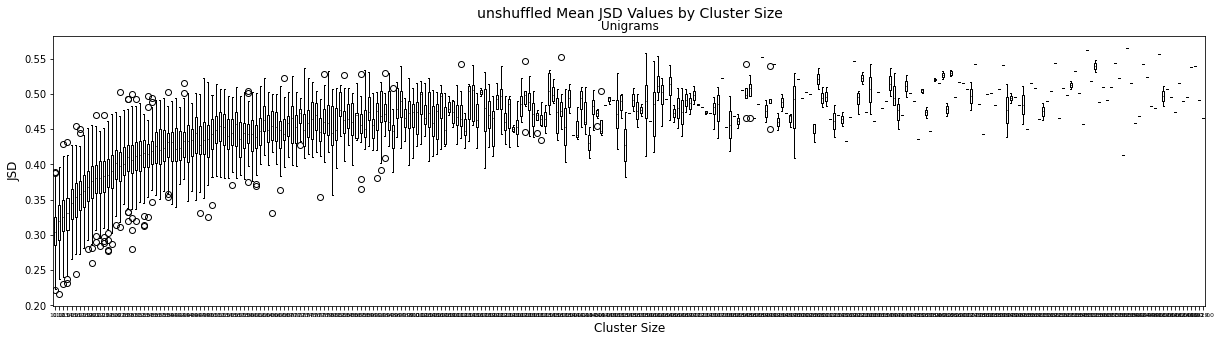

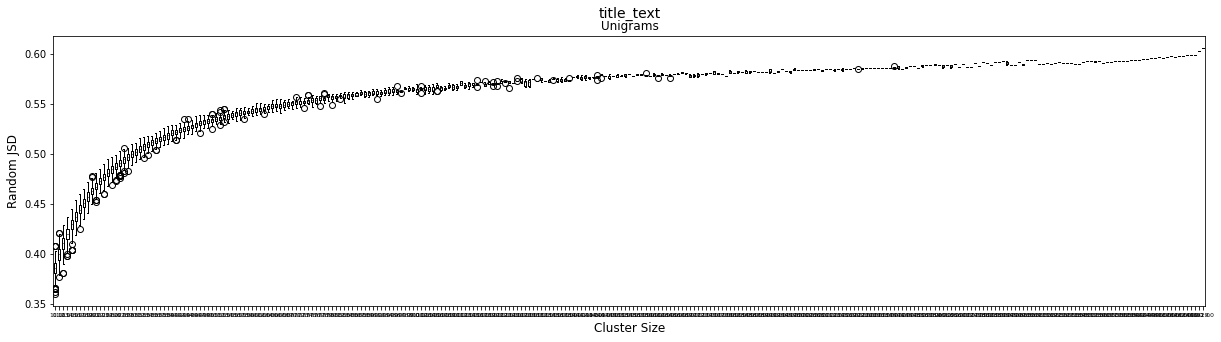

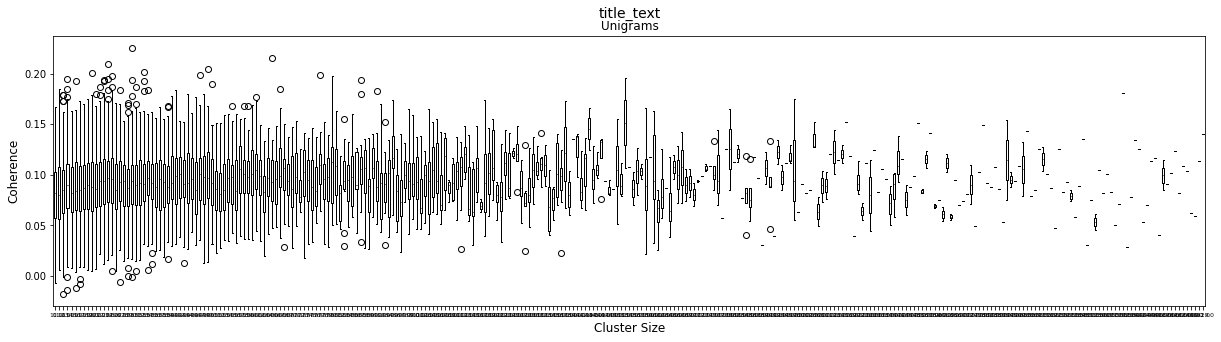

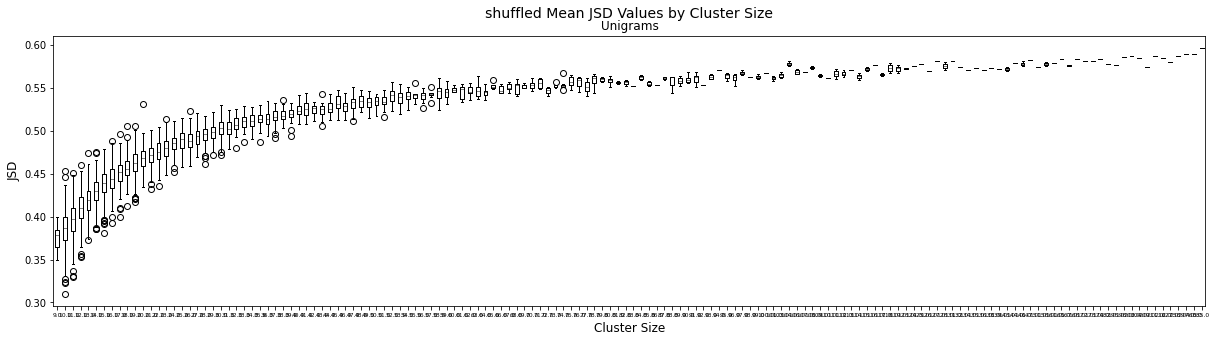

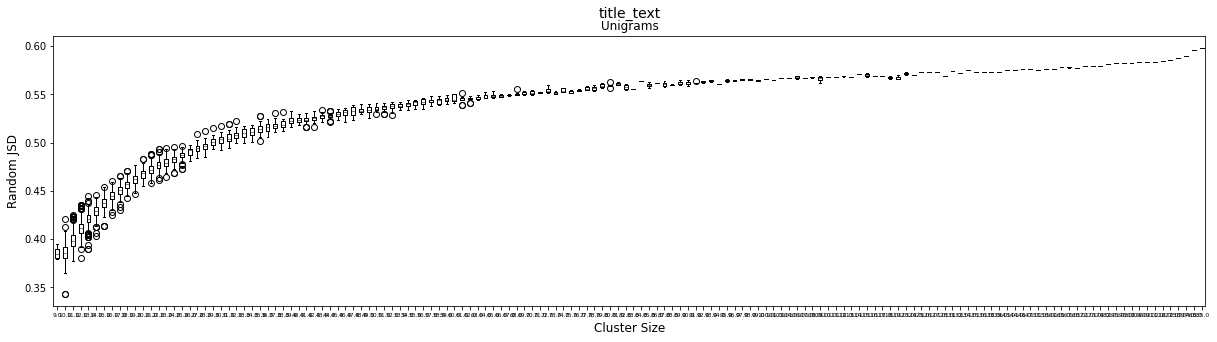

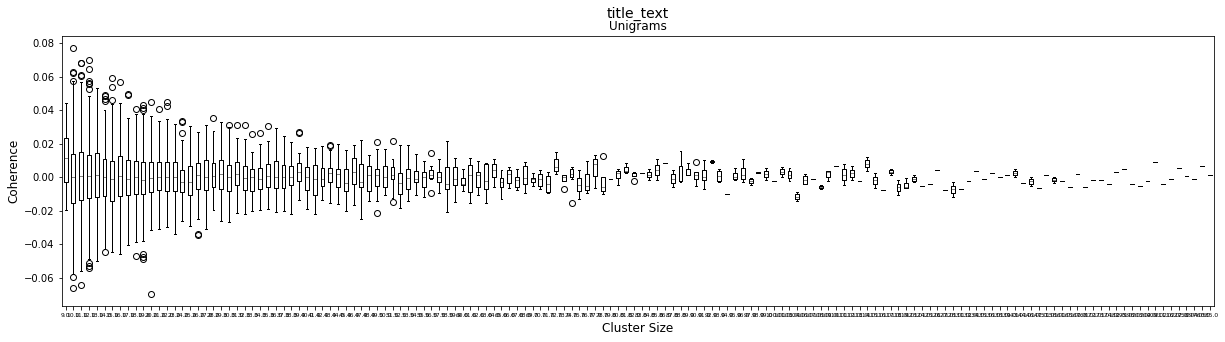

In [14]:
boxprops = dict(linestyle='-', linewidth=1)
medianprops = dict(linestyle='-', linewidth=0.5)

for i in range(len(df_list)):

    bp_jsd = df_list[i].boxplot(column = 'mean_jsd', 
                            by='post_jsd_size', 
                            figsize=(20, 5), 
                            rot = 0,
                            boxprops=boxprops,
                            medianprops=medianprops,
                            color=dict(boxes='black', whiskers='black', medians='black', caps='black'))

    # label adjustment
    p = plt.gca()
    p.set_xlabel("Cluster Size", fontsize = 12)
    p.set_ylabel("JSD", fontsize = 12)
    title_text = names[i] + " Mean JSD Values by Cluster Size"
    plt.suptitle(title_text, fontsize=14)
    p.set_title("Unigrams")
    p.tick_params(axis='y', labelsize=10)
    p.tick_params(axis='x', labelsize=6)
    p.grid(b=None)
    
    bp_rand_jsd = df_list[i].boxplot(column = 'mean_random_jsd', 
                            by='post_jsd_size', 
                            figsize=(20, 5), 
                            rot = 0,
                            boxprops=boxprops,
                            medianprops=medianprops,
                            color=dict(boxes='black', whiskers='black', medians='black', caps='black'))

    # label adjustment
    p = plt.gca()
    p.set_xlabel("Cluster Size", fontsize = 12)
    p.set_ylabel("Random JSD", fontsize = 12)
    title_text = names[i] + " Mean Random JSD Values by Cluster Size"
    plt.suptitle('title_text', fontsize=14)
    p.set_title("Unigrams")
    p.tick_params(axis='y', labelsize=10)
    p.tick_params(axis='x', labelsize=6)
    p.grid(b=None)
    
    bp_coherence = df_list[i].boxplot(column = 'jsd_coherence', 
                            by='post_jsd_size', 
                            figsize=(20, 5), 
                            rot = 0,
                            boxprops=boxprops,
                            medianprops=medianprops,
                            color=dict(boxes='black', whiskers='black', medians='black', caps='black'))
    
    p = plt.gca()
    p.set_xlabel("Cluster Size", fontsize = 12)
    p.set_ylabel("Coherence", fontsize = 12)
    title_text = names[i] + " Mean Coherence Values by Cluster Size"
    plt.suptitle('title_text', fontsize=14)
    p.set_title("Unigrams")
    p.tick_params(axis='y', labelsize=10)
    p.tick_params(axis='x', labelsize=6)
    p.grid(b=None)
    
#     plt.savefig('/Users/shreya/Documents/consolidated_output/unigrams/ncf_20_mean_jsd.png', dpi=300)

In [16]:
table_list = [i for i in range(len(names))]
# headers = ["Name", "Pre-#Articles", "Post-#Articles","Post-JSD-#Articles", 
#            "Pre-Coverage", "Post-Coverage", "Avg Conductance", "Avg JSD", 
#            "Min JSD", "Max JSD", "Avg Coherence", "Min Coherence", "Max Coherence"]

headers = ["Name", "Pre-#Articles", "Post-#Articles",
           "Post-JSD-#Articles", "Pre-Coverage", "Post-Coverage", "Avg Conductance", 
           "Avg JSD", "Avg Coherence"]

for i in range(len(df_list)):
    
    original = sum(df_list[i]["total_size"])
    after_missing = sum(df_list[i]["pre_jsd_size"])
    after_jsd_nans = sum(df_list[i]["post_jsd_size"])
    
    mean_jsd = round(sum(df_list[i]['post_jsd_size']*df_list[i]['mean_jsd'])/sum(df_list[i]['post_jsd_size']), 3)
#     max_avg_jsd = round(df_list[i]['mean_jsd'].max(), 3)
#     min_avg_jsd = round(df_list[i]['mean_jsd'].min(), 3)
    coherence = round(sum(df_list[i]['post_jsd_size']*df_list[i]['jsd_coherence'])/sum(df_list[i]['post_jsd_size']), 3)
#     min_coherence = round(df_list[i]['jsd_coherence'].min(), 3)
#     max_coherence = round(df_list[i]['jsd_coherence'].max(), 3)
    
    conductance_name = '/Users/shreya/Documents/mcl/immunology/conductance_' + names[i] + '.csv'
    conductance_csv = pd.read_csv(conductance_name)
    avg_conductance = round(sum(conductance_csv['cluster_counts']*conductance_csv['conductance'])/sum(conductance_csv['cluster_counts']), 3)
    
    
    table_list[i] = [names[i], original, after_missing, after_jsd_nans, round((original*100)/450478, 2), 
                     round((after_missing*100)/450478, 2), avg_conductance, mean_jsd, coherence]
    
print('The following table is for JSD (Unigrams)')
print('Tokens with cluster frequency = 1 were removed.')
print('Note that "Avg JSD", "Avg Coherence", and "Avg Conductance" are weighted averages')
display(HTML(tabulate.tabulate(table_list, tablefmt='html', headers=headers)))
# print(tabulate.tabulate(table_list, headers, tablefmt="psql"))

The following table is for JSD (Unigrams)
Tokens with cluster frequency = 1 were removed.
Note that "Avg JSD", "Avg Coherence", and "Avg Conductance" are weighted averages


Name,Pre-#Articles,Post-#Articles,Post-JSD-#Articles,Pre-Coverage,Post-Coverage,Avg Conductance,Avg JSD,Avg Coherence
unshuffled,440611,384321,384321,97.81,85.31,0.278,0.433,0.093
shuffled,193837,169480,169437,43.03,37.62,0.979,0.483,0
